# SQL Query & DB formatting for LNDB data
 @author Lelia Deville \
 @date   12/1/23

In [1]:
import pandas as pd
import pypyodbc as odbc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
"""
defining all the basic parameters
these are likely subject to change as the data collection methods change and grow
"""

DRIVER_NAME = 'SQL Server'
SERVER_NAME = 'PARTLABHMI'
DATABASE_NAME = 'EI'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection =yes;
    uid=GradStudent;
    pwd=1000W/m2;
"""
conn = odbc.connect(connection_string)

In [3]:
"""
creating cursor to query data from the database
a cursor is an object that is stored and used to read over rows of data in a database
"""
lasel_cursor = conn.cursor()

In [4]:
"""
look at what tables exist and which ones may be of interest
here we just print the first ten; to view all tables in a database use print(tables)
"""
tables = []
for row in lasel_cursor.tables():
    tables.append(row['table_name'])
tables[0:10]

['aa_sql_objects',
 'affected_overview_symbols',
 'alarm_message_defaults',
 'alarm_message_timestamps',
 'alarm_message_translations',
 'alarm_messages',
 'attribute_definition',
 'attribute_reference',
 'attributes_translation_table',
 'autobind_device']

In [5]:
"""
using f select we can name a table and pull that table from the database
the lines at the bottom replace those numerical tag ids with the str description
"""

table_name = 'dbo.Draker_OneMinINVDC02' #--------------------------> define the table here
start = '2023-11-30 00:00:00'
end = '2023-12-02 00:00:00'


lasel_cursor.execute(f"select * from {table_name} where TmStamp between '{start}' and '{end}';")
data = []
for row in lasel_cursor:
    data.append(row)
num_fields = len(lasel_cursor.description)
field_names = ([i[0] for i in lasel_cursor.description])
df = pd.DataFrame(data, columns=[field_names])
df.columns = df.columns.get_level_values(0)
df.index = pd.to_datetime(df['tmstamp'])
df.index = df.index.tz_localize('America/Chicago', ambiguous='infer')
df = df.resample('T').mean()

df.head()

,recnum,bom_temp_c_avg,inv_dc_power_string01_avg_1,inv_dc_power_string01_avg_2,inv_dc_power_string01_avg_3,inv_dc_power_string01_avg_4,inv_dc_power_string01_avg_5,inv_dc_power_string01_avg_6,inv_dc_power_string01_avg_7,inv_dc_power_string01_avg_8,...,inv_dc_power_avg_30,inv_dc_power_avg_31,inv_dc_power_avg_32,inv_dc_power_avg_33,inv_dc_power_avg_34,inv_dc_power_avg_35,inv_dc_power_avg_36,inv_dc_power_avg_37,inv_dc_power_avg_38,inv_dc_power_avg_39
tmstamp,,,,,,,,,,,,,,,,,,,,,
2023-11-30 05:57:00-06:00,578388.0,10.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-30 05:58:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 05:59:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 06:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 06:01:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Power')

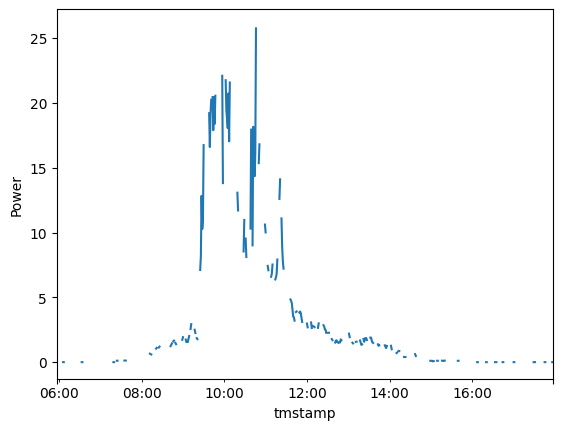

In [6]:
df['inv_dc_power_avg_10'].plot()
plt.xlim('2023-11-30 05:57:00-06:00','2023-11-30 17:57:00-06:00')
plt.ylabel('Power')